In [3]:
from util import go_to_project_root
go_to_project_root()

CWD cambiado a la raíz del proyecto: /home/epsilon/Documents/doctorado/S2/ENSTA630/tareas/HW2


# Problema 1e

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

from source.fit.inference.test_chow import test_chow

from source.data.loaders import create_dataset
from source.models.ivar import IVAR
from source.data.transform import create_var_dataset
from source.display.hw import hw2 as plots
from source.display.hw.hw1 import save_figure
%load_ext autoreload
%autoreload 2

In [5]:
path = './data/base_25.xls'
dataset = create_dataset(path, problem=5)

i_reshaped = dataset['i'][12:]
X = np.vstack([dataset['pi'], dataset['y'], i_reshaped]).T
X = np.vstack([dataset['pi'], dataset['y'], i_reshaped]).T

p = 2          # rezagos
n = X.shape[1] # numero de variables
model = IVAR(inp_dim=n,
             c=0,
             p=p)
model._is_stationary()

# Crear Matriz B0
b1, b2, b3 = sp.symbols('b1 b2 b3')
B0 = sp.Matrix([[1,b1,0],[0,1,b2],[b3,0,1]])

# Estimar el IVAR
model.set_B0(B0=B0, X=X, guess = [0.05, 1/100000, 0.05, 1/10000, 1/1000000, 1])

# Calcular Psi
psi_sequence = model._compute_psi_sequence(H=11)

# Calcular IRF
irf_list = [psi @ model.B0  @ np.sqrt(model.D) for psi in psi_sequence]

# Convertir a un único array de numpy y devolver
irf_list = np.array(irf_list)


# Variables
nombres = ['Inflación', 'Crecimiento', 'Tasa de Interes']

[INFO] ¡Datos cargados exitosamente!


✅ Figura guardada exitosamente en ./presentation/figures/hw2/p1d/impulso_respuesta.pdf


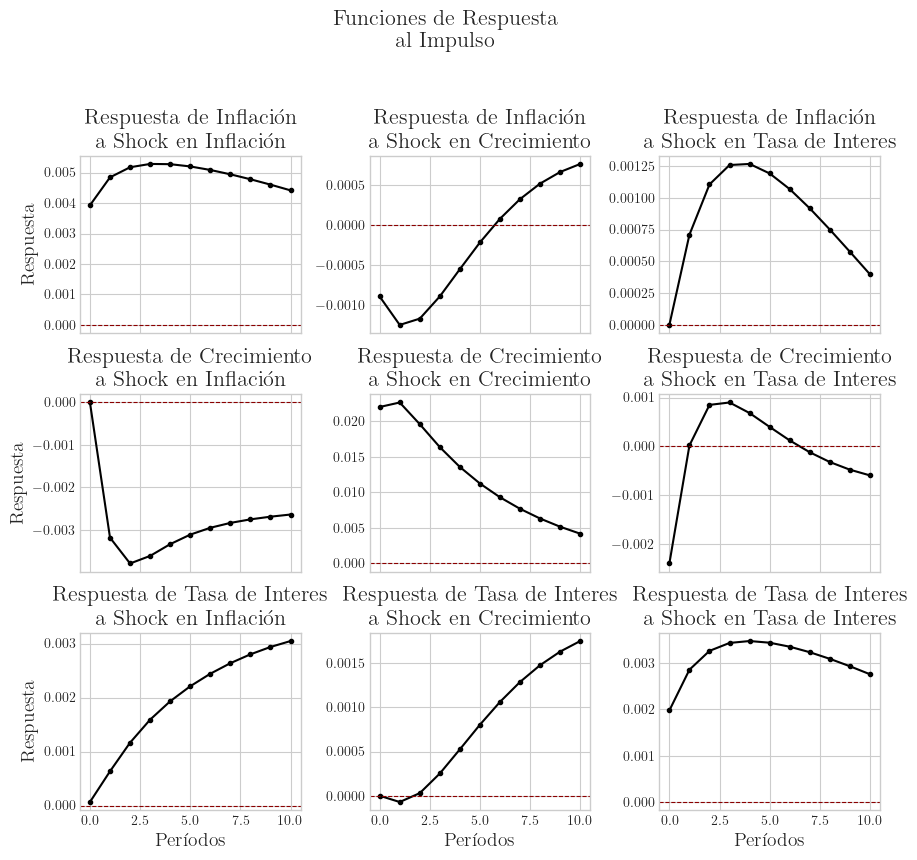

In [10]:
# Grafico (ahora debería funcionar)
fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True)
fig, axes = plots.plot_with_user_style(irf_list, nombres, fig=fig, axes=axes)
save_figure(fig, './presentation/figures/hw2/p1d/impulso_respuesta.pdf')